# IPL 2025 DATA ANALYSIS
#### To know which was the top batsman in IPL 2025

In [3]:
#improt libraries
import numpy as np #linear algebra 
import pandas as pd #data processing

In [4]:
#Reading the csv file
deliveries = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches.csv')

In [5]:
#To check how many rows and columns in this data
matches.shape

(74, 22)

In [6]:
deliveries.shape

(17183, 19)

In [7]:
#To know about the data
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   match_id             74 non-null     int64  
 1   date                 74 non-null     object 
 2   venue                74 non-null     object 
 3   team1                74 non-null     object 
 4   team2                74 non-null     object 
 5   stage                74 non-null     object 
 6   toss_winner          73 non-null     object 
 7   toss_decision        74 non-null     object 
 8   first_ings_score     73 non-null     float64
 9   first_ings_wkts      73 non-null     float64
 10  second_ings_score    72 non-null     float64
 11  second_ings_wkts     72 non-null     float64
 12  match_result         74 non-null     object 
 13  match_winner         71 non-null     object 
 14  wb_runs              34 non-null     object 
 15  wb_wickets           38 non-null     objec

In [8]:
#show some of the data
matches.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,match_result,match_winner,wb_runs,wb_wickets,balls_left,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 22,2025","Eden Gardens, Kolkata",KKR,RCB,League,RCB,Bowl,174.0,8.0,...,completed,RCB,NaN,7,22.0,Krunal Pandya,Virat Kohli,59.0,Krunal Pandya,3--29
1,2,"March 23,2025","Rajiv Gandhi International Stadium, Hyderabad",SRH,RR,League,RR,Bowl,286.0,6.0,...,completed,SRH,44,NaN,0.0,Ishan Kishan,Ishan Kishan,106.0,Tushar Deshpande,3--44
2,3,"March 23,2025","MA Chidambaram Stadium, Chennai",CSK,MI,League,CSK,Bowl,155.0,9.0,...,completed,CSK,NaN,4,5.0,Noor Ahmad,Rachin Ravindra,65.0,Noor Ahmad,4--18
3,4,"March 24,2025","ACA-VDCA Cricket Stadium, Vishakhapatnam",DC,LSG,League,DC,Bowl,209.0,8.0,...,completed,DC,NaN,1,3.0,Ashutosh Sharma,Nicholas Pooran,75.0,Mitchell Starc,3--42
4,5,"March 25,2025","Narendra Modi Stadium, Ahmedabad",GT,PBKS,League,GT,Bowl,243.0,5.0,...,completed,PBKS,11,NaN,0.0,Shreyas Iyer,Shreyas Iyer,97.0,Sai Kishore,3--30


In [9]:
print(matches.shape, deliveries.shape)

(74, 22) (17183, 19)


In [10]:
def show_df_info(df):
    info_dict = {
        "Column Name ": df.columns,
        "Data Type ": df.dtypes.values,
        "Non-Null Count ": df.count().values,
        "Unique Values ": df.nunique().values,
        "Missing Values ": df.isnull().sum().values
    }
    info_df = pd.DataFrame(info_dict)
    print(info_df.to_string(index=False))
show_df_info(matches)

       Column Name  Data Type   Non-Null Count   Unique Values   Missing Values 
           match_id      int64               74              74                0
               date     object               74              62                0
              venue     object               74              13                0
              team1     object               74              10                0
              team2     object               74              10                0
              stage     object               74               3                0
        toss_winner     object               73              10                1
      toss_decision     object               74               2                0
   first_ings_score    float64               73              56                1
    first_ings_wkts    float64               73               9                1
  second_ings_score    float64               72              51                2
   second_ings_wkts    float

In [11]:
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns 

In [12]:
sns.set_style('darkgrid')
sns.set_palette('coolwarm')
matches[['first_ings_score', 'second_ings_score']]

,first_ings_score,second_ings_score
0,174.0,177.0
1,286.0,242.0
2,155.0,158.0
3,209.0,211.0
4,243.0,232.0
...,...,...
69,227.0,230.0
70,101.0,106.0
71,228.0,208.0
72,203.0,207.0


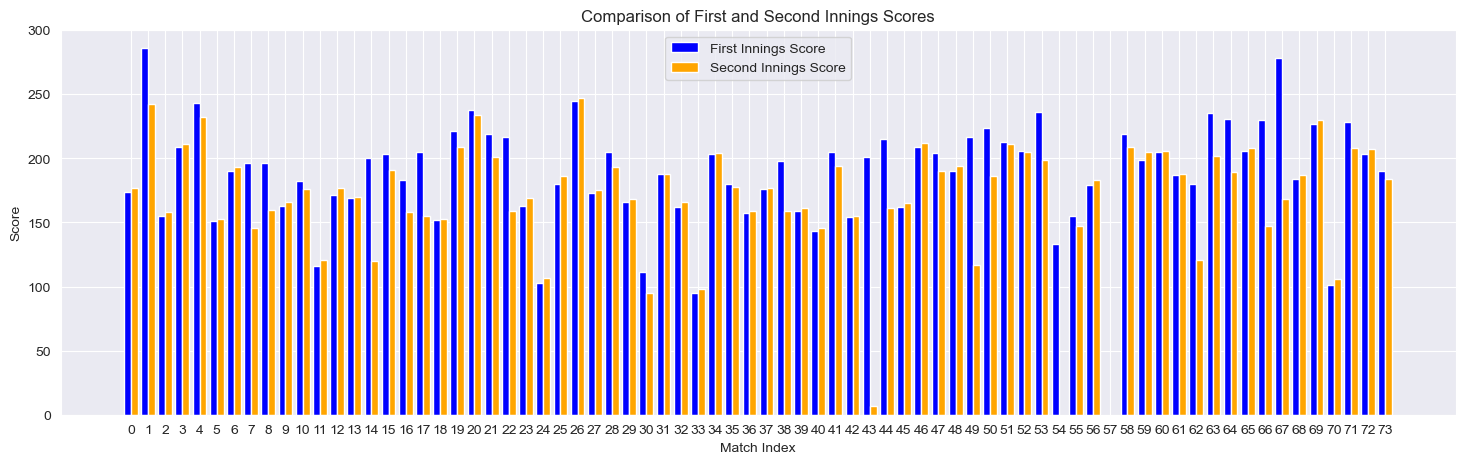

In [13]:
# Comparing first and second
index = np.arange(len(matches)) #Row indices
width = 0.4 #Bar width 

fig, ax = plt.subplots(figsize = (18,5)) #to manager plot size
ax.bar(index - width/2, matches['first_ings_score'], width, label = 'First Innings Score', color = 'blue')
ax.bar(index + width/2, matches['second_ings_score'], width, label = 'Second Innings Score', color = 'orange')

ax.set_xlabel('Match Index')
ax.set_ylabel('Score')
ax.set_title('Comparison of First and Second Innings Scores')

ax.set_xticks(index)
ax.set_xticklabels(index)
ax.legend()

plt.show()


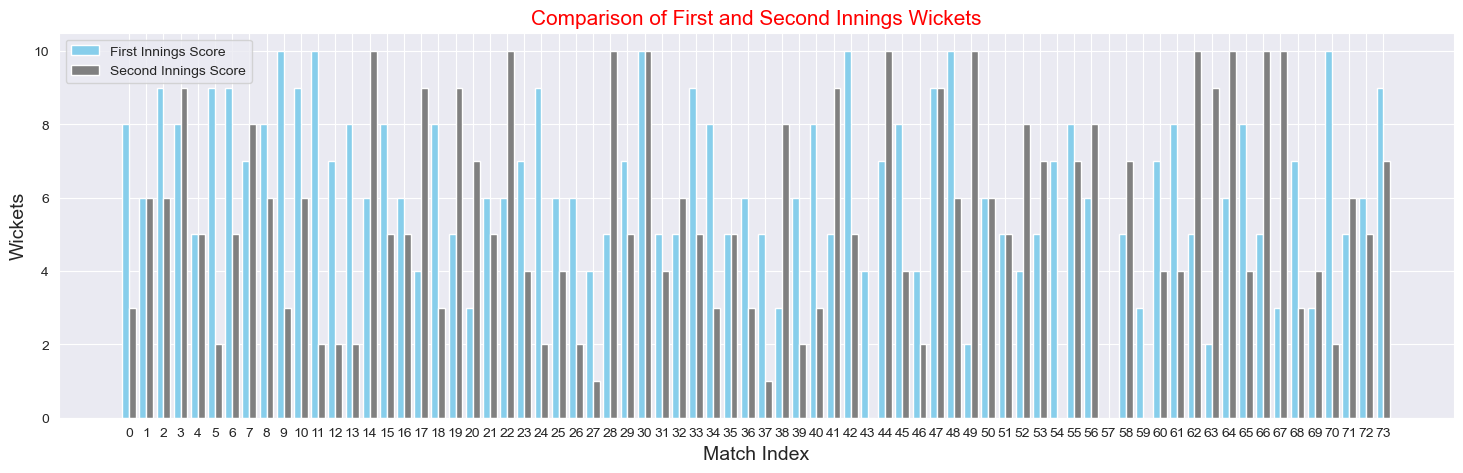

In [220]:
# Comparing first and second immings wickets
sns.set_style('darkgrid')
sns.set_palette('muted')
index = np.arange(len(matches))
width = 0.4 #Bar width

fig, ax = plt.subplots(figsize = (18,5))
ax.bar(index - width/2, matches ['first_ings_wkts'], width, label = 'First Innings Score', color = 'skyblue')
ax.bar(index + width/2, matches['second_ings_wkts'], width, label = 'Second Innings Score', color = 'gray')

ax.set_xlabel('Match Index', fontsize=14)
ax.set_ylabel('Wickets', fontsize=14)
ax.set_title('Comparison of First and Second Innings Wickets', fontsize=15, color='red')

ax.set_xticks(index)
ax.set_xticklabels(index)
ax.legend()

plt.show()

In [60]:
#Calculating Top performing Batsman [ORANGE CAP]
top_batsman = matches [['top_scorer', 'highscore']]
top_batsman = top_batsman.groupby("top_scorer", as_index=False) ["highscore"].sum()
top_batsman = top_batsman.sort_values(by='highscore', ascending=False)
top_batsman

,top_scorer,highscore
15,Nicholas Pooran,293.0
38,Virat Kohli,269.0
27,Sai Sudarshan,253.0
7,Ishan Kishan,244.0
32,Shubman Gill,227.0
10,KL Rahul,227.0
40,Yashasvi Jaiswal,216.0
31,Shreyas Iyer,184.0
13,Mitchell Marsh,182.0
26,Ryan Rickelton,181.0


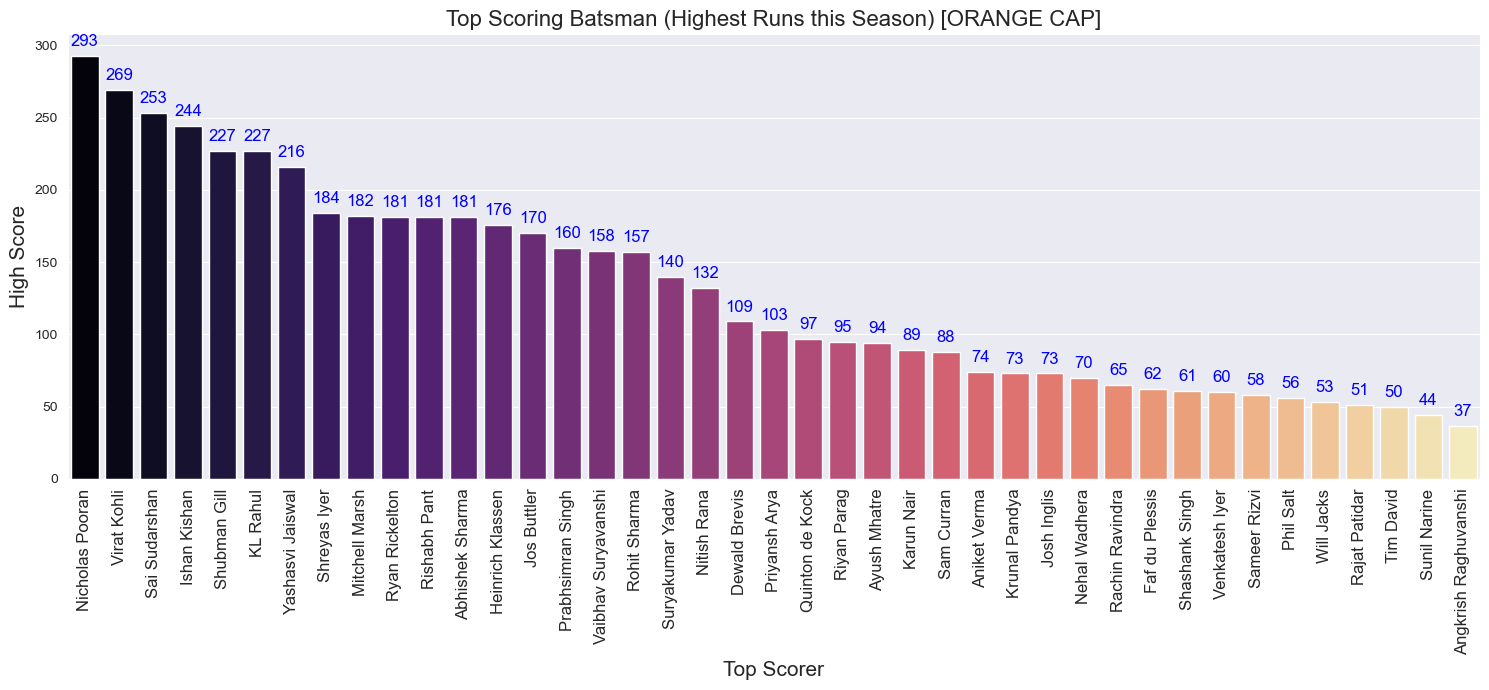

In [204]:
#Graphical representation:
plt.figure(figsize=(15,7))# Set figure size
bar_plot = sns.barplot(data=top_batsman, x='top_scorer', y='highscore', hue='top_scorer', palette='magma')

# Add title and labets
plt.title("Top Scoring Batsman (Highest Runs this Season) [ORANGE CAP]", fontsize=16)
plt.xlabel("Top Scorer", fontsize=15)
plt.ylabel("High Score", fontsize=15)

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=90, fontsize=12)

# Add value annotations on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=12, color='blue',
        xytext=(0, 5),
        textcoords='offset points')

plt.tight_layout()# Adjust layout to make room for rotated labels
plt.show()# Show the plot
